In [156]:
from tqdm import tqdm
import numpy as np
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from pprint import pprint as pp
import datetime
import pickle

In [157]:
file = open("buoy_metadata.pickle",'rb')
meta_dict = pickle.load(file)
file = open("A01_df.pickle",'rb')
A01_df = pickle.load(file)

In [158]:
A01_df.shape

(868672, 43)

In [159]:
file = open("time_series_map",'rb')
int2time, time2int = pickle.load(file)

In [27]:
file = open("E01_undupped.pickle",'rb')
E01_undupped = pickle.load(file)

In [173]:
file = open("A01_undupped.pickle",'rb')
A01_un = pickle.load(file)

In [34]:
E01_undupped.keys()

dict_keys(['E01_aanderaa_all', 'E01_accelerometer_all', 'E01_waves_mstrain_all', 'E01_met_all', 'E01_optics_hist', 'E01_sbe16_trans_all', 'E01_sbe37_all', 'E01_suna_all', 'E01_corrected_nitrate_csv'])

In [33]:
E01_undupped['E01_aanderaa_all'] = E01_undupped['E01_aanderaa_all'].drop(['longitude','latitude','depth'],axis=1)

In [36]:
E01_undupped['E01_accelerometer_all'].drop(['longitude','latitude','depth'],axis=1,inplace=True)

In [37]:
E01_undupped['E01_waves_mstrain_all'].drop(['longitude','latitude','depth','time_created','offset_time','time_modified'],axis=1,inplace=True)

In [42]:
E01_undupped['E01_met_all'].drop(['longitude','latitude','depth'],axis=1,inplace=True)

In [44]:
E01_undupped['E01_optics_hist'].drop(['longitude','latitude','depth'],axis=1,inplace=True)

In [47]:
E01_undupped['E01_sbe16_trans_all'].drop(['longitude','latitude','depth','time_created','time_modified'],axis=1,inplace=True)

In [50]:
E01_undupped['E01_sbe37_all'].drop(['longitude','latitude','depth'],axis=1,inplace=True)

In [52]:
E01_undupped['E01_suna_all'].drop(['longitude','latitude','depth','time_modified'],axis=1,inplace=True)

In [55]:
E01_undupped['E01_corrected_nitrate_csv'].drop(['longitude','latitude','depth','Year','Day','Month','Hour','Nitrate'],axis=1,inplace=True)

In [58]:
for dat in E01_undupped:
    print(E01_undupped[dat].isna().sum()/len(E01_undupped[dat]))

temperature          0.005097
current_direction    0.004599
current_speed        0.003008
dtype: float64
dominant_wave_period       0.001323
significant_wave_height    0.001794
dtype: float64
wind_wave_height_3                   0.939932
dominant_wave_period_3               0.001098
maximum_wave_height_3                0.939932
index                                0.939932
wind_wave_period_3                   0.939932
swell_wave_height_3                  0.939932
principal_wave_direction_3           0.939932
swell_wave_period_3                  0.939932
significant_wave_height_3            0.001169
mean_wave_direction_spread_3         0.939932
mean_wave_direction_3                0.000043
principal_wave_direction_spread_3    0.939932
wave_steepness_3                     0.939932
dtype: float64
wind_direction         0.000093
barometric_pressure    0.031156
air_temperature        0.000468
visibility             0.049542
wind_gust              0.000113
wind_speed             0.000126
dty

In [61]:
for dat in E01_undupped:
    E01_undupped[dat]['time']=[int2time['E01'][i] for i in E01_undupped[dat].index]
    E01_undupped[dat].set_index('time',inplace=True)

In [174]:
for dat in A01_un:
    A01_un[dat]['time']=[int2time['A01'][i] for i in A01_un[dat].index]
    A01_un[dat].set_index('time',inplace=True)

In [172]:
A01_df.isna().sum()

time_created                         752409
current_direction                    777418
mean_wave_direction_3                868672
principal_wave_direction_3           868672
significant_wave_height_3            868672
conductivity                         593387
longitude                             19407
wind_speed                           868672
latitude                             868672
swell_wave_height_3                  868672
turbidity                            868672
chlorophyll                          868672
time_modified                        868672
wind_gust                            868672
wind_wave_period_3                   868672
air_temperature                      868672
temperature                          868672
barometric_pressure                  868672
principal_wave_direction_spread_3    868672
swell_wave_period_3                  868672
visibility                           868672
dissolved_oxygen                     868672
attenuation                     

In [175]:
bad = ['longitude','latitude','depth','time_modified','time_created','dissolved_oxygen']
for dat in A01_un:
    print(dat)
    print(A01_un[dat].columns)

A01_aanderaa_hist
Index(['longitude', 'temperature', 'depth', 'latitude', 'current_direction',
       'current_speed'],
      dtype='object')
A01_aanderaa_o2_all
Index(['longitude', 'current_u', 'time_created', 'current_v', 'temperature',
       'depth', 'latitude', 'time_modified', 'dissolved_oxygen',
       'current_direction', 'percent_oxygen_saturation', 'current_speed'],
      dtype='object')
A01_accelerometer_all
Index(['dominant_wave_period', 'longitude', 'depth', 'latitude',
       'significant_wave_height'],
      dtype='object')
A01_waves_mstrain_all
Index(['wind_wave_height_3', 'longitude', 'dominant_wave_period_3',
       'time_created', 'maximum_wave_height_3', 'index', 'wind_wave_period_3',
       'swell_wave_height_3', 'offset_time', 'depth', 'latitude',
       'principal_wave_direction_3', 'time_modified', 'swell_wave_period_3',
       'significant_wave_height_3', 'mean_wave_direction_spread_3',
       'mean_wave_direction_3', 'principal_wave_direction_spread_3',
      

/var/folders/g6/dvksyd2x2vzgtx4pt5g71bzh0000gn/T/ipykernel_57859/1124188939.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  E01_undupped['E01_optics_hist']['chlorophyll'].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)


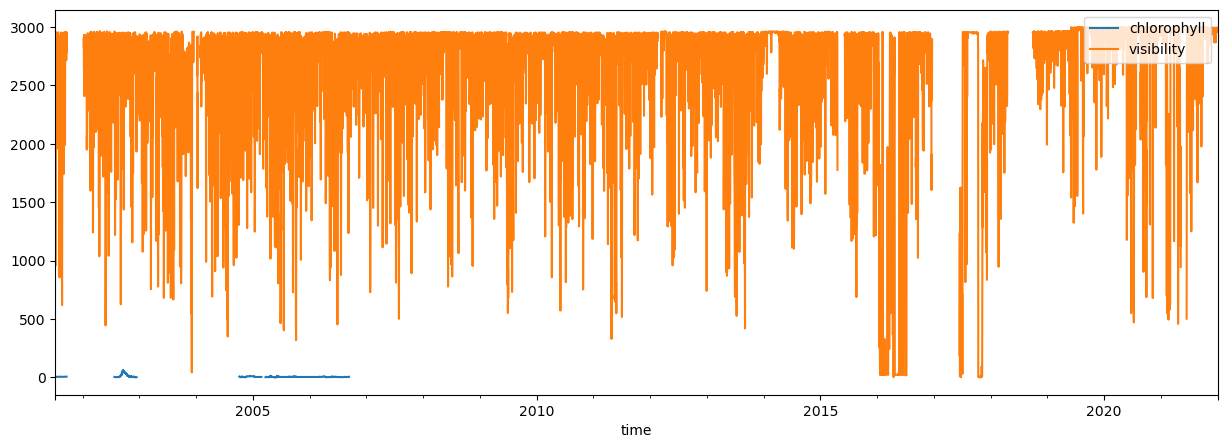

In [176]:
dr = ['2000-01-01','2022-01-01']
fig, ax = plt.subplots(1,1,figsize=(15, 5))
E01_undupped['E01_optics_hist']['chlorophyll'].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)
E01_undupped['E01_met_all']['visibility'].loc[dr[0]:dr[1]].resample("D").mean().plot(style="-",ax=ax)
plt.legend(loc = 'upper right')

In [199]:
dr = ['2000-01-01','2001-01-01']
A01_un['A01_optics_s_all'].head(5800).isna().sum()

longitude       0
chlorophyll    27
depth           0
latitude        0
turbidity       0
dtype: int64

In [151]:
def sampling(sequence, n_steps):

    X, Y = list(), list()

    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence)-1:
            break
        x, y = sequence[i:sam], sequence[sam]

        X.append(x)

        Y.append(y)

    return np.array(X), np.array(Y)

In [202]:
num = 5000
mylist = A01_un['A01_optics_s_all']['chlorophyll']
d = {i: mylist.index[i] for i in range(len(mylist))}
dr = {v:k for k,v in d.items()}
for i in mylist[mylist.isna()[mylist.isna()].index].index:
    mylist[i] = mylist[d[dr[i]-1]]

In [209]:
A01_df.columns

Index(['time_created', 'current_direction', 'mean_wave_direction_3',
       'principal_wave_direction_3', 'significant_wave_height_3',
       'conductivity', 'longitude', 'wind_speed', 'latitude',
       'swell_wave_height_3', 'turbidity', 'chlorophyll', 'time_modified',
       'wind_gust', 'wind_wave_period_3', 'air_temperature', 'temperature',
       'barometric_pressure', 'principal_wave_direction_spread_3',
       'swell_wave_period_3', 'visibility', 'dissolved_oxygen', 'attenuation',
       'salinity', 'index', 'wave_steepness_3', 'percent_oxygen_saturation',
       'transmissivity', 'current_v', 'depth', 'mean_wave_direction_spread_3',
       'dominant_wave_period_3', 'transmissivity_voltage', 'current_u',
       'offset_time', 'significant_wave_height', 'dominant_wave_period',
       'current_speed', 'sigma_t', 'wind_direction', 'oxygen_saturation',
       'wind_wave_height_3', 'maximum_wave_height_3'],
      dtype='object')

In [205]:
data = A01_un['A01_optics_s_all']
data['y'] = mylist
data

,longitude,chlorophyll,depth,latitude,turbidity,y
time,,,,,,
2005-10-22 12:00:00+00:00,-70.5667,0.975000,3.0,42.5236,0.5376,0.975000
2005-10-22 13:00:00+00:00,-70.5667,0.950000,3.0,42.5236,0.5504,0.950000
2005-10-22 14:00:00+00:00,-70.5667,1.075000,3.0,42.5236,0.5632,1.075000
2005-10-22 15:00:00+00:00,-70.5667,0.850000,3.0,42.5236,0.5696,0.850000
2005-10-22 16:00:00+00:00,-70.5667,1.112500,3.0,42.5236,0.5696,1.112500
...,...,...,...,...,...,...
2023-04-12 05:00:00+00:00,-70.5655,15.936062,3.0,42.5232,1.8725,15.936062
2023-04-12 06:00:00+00:00,-70.5655,20.634537,3.0,42.5232,1.9600,20.634537
2023-04-12 07:00:00+00:00,-70.5655,11.358683,3.0,42.5232,2.0325,11.358683


In [ ]:
mylist.isna().sum()
n_steps = 20
X, Y = sampling(mylist, n_steps)
for i in range(len(X)-1):
    print(X[i], Y[i])

<Axes: >

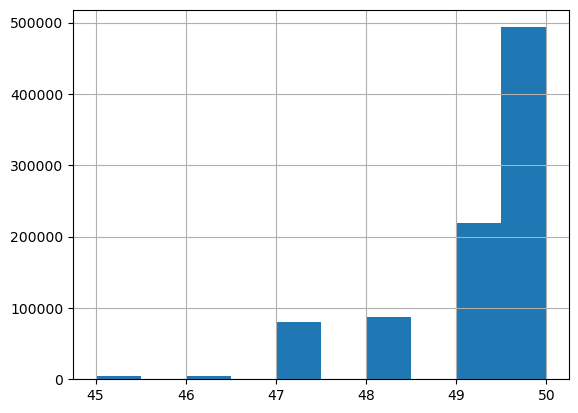

In [19]:
I01_df.isna().sum(axis=1).hist()